<a href="https://colab.research.google.com/github/eltondeoliveirasilva/Classificacao/blob/main/Metricas_na_pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the Data

In [7]:
df_abt = pd.read_excel('/content/drive/MyDrive/churn_data.xlsx')
df_abt.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_abt["TotalCharges"] = pd.to_numeric(df_abt["TotalCharges"],errors='coerce')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df_abt = df_abt.dropna()

In [ ]:
df_abt.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Train-Test Split

In [10]:
cat_vars = ['PhoneService',"Contract","PaperlessBilling","PaymentMethod"]
num_vars = ["tenure","MonthlyCharges","TotalCharges"]
modeling_vars = cat_vars + num_vars

In [11]:
X = df_abt.filter(modeling_vars).copy()
y = df_abt['Churn'].copy()
y = pd.DataFrame(y)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

In [15]:
X = pd.get_dummies(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Feature Engineering

In [17]:
X_train

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
6625,12,91.30,1094.50,False,True,True,False,False,False,True,False,False,True,False
6994,43,24.45,993.15,False,True,False,True,False,False,True,True,False,False,False
4406,37,78.90,2976.95,False,True,True,False,False,False,True,False,True,False,False
2767,46,84.80,3958.85,False,True,True,False,False,False,True,True,False,False,False
501,71,80.70,5676.00,False,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208,61,80.80,4860.85,False,True,False,False,True,False,True,True,False,False,False
5474,1,84.60,84.60,False,True,True,False,False,False,True,False,False,True,False
4280,64,19.70,1274.05,False,True,False,False,True,False,True,True,False,False,False
4452,70,86.45,5950.20,False,True,False,False,True,True,False,False,True,False,False


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn,label
7011,4,60.40,272.15,False,True,True,False,False,False,True,False,False,False,True,1,0
3491,44,70.95,3250.45,False,True,False,True,False,False,True,False,False,True,False,0,0
603,46,108.65,4903.20,False,True,False,False,True,True,False,False,False,True,False,0,0
7032,1,75.75,75.75,False,True,True,False,False,False,True,False,False,True,False,1,1
2057,22,79.20,1742.75,False,True,True,False,False,False,True,False,False,True,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931,13,98.00,1237.85,False,True,True,False,False,False,True,False,False,True,False,1,1
3309,25,19.90,527.50,False,True,False,True,False,True,False,False,True,False,False,0,0
2025,72,116.85,8477.70,False,True,False,False,True,False,True,True,False,False,False,0,0
2042,28,64.45,1867.60,False,True,True,False,False,True,False,True,False,False,False,0,0


In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

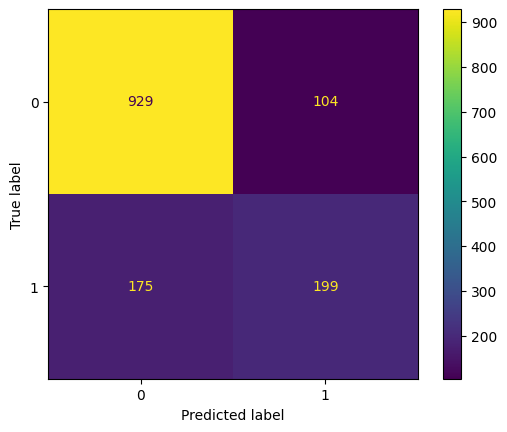

In [25]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format='d');

In [26]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.7905405405405406
Acurácia (Teste): 0.8017057569296375
Acurácia Balanceada (Treino): 0.6981887635462034
Acurácia Balanceada (Teste): 0.7157039617748006
Precision (Treino): 0.6342082980524979
Precision (Teste): 0.6567656765676567
Recall (Treino): 0.5010033444816053
Recall (Teste): 0.5320855614973262
F1-Score (Treino): 0.5597907324364724
F1-Score (Teste): 0.587887740029542
ROCAUC (Treino): 0.830174530261929
ROCAUC (Teste): 0.8565222005373476


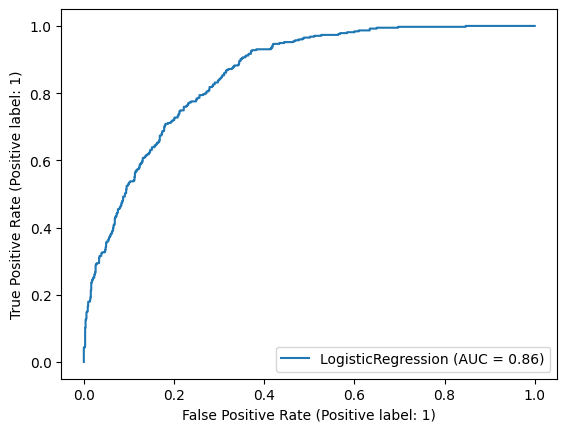

In [29]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr, X_test, y_test);

In [30]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    'precision': [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    'recall': [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    'f1_score': [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.790541,0.698189,0.634208,0.501003,0.559791,0.830175
1,Logistic Regression,teste,0.801706,0.715704,0.656766,0.532086,0.587888,0.856522
